# `snell_example_artifacts.ipynb`

### Notebook with a few examples shwocasing potential artifacts

In [8]:
import snell
import matplotlib.pyplot as plt
import numpy as np
import tifffile

%matplotlib notebook
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Initialize display variables using class constructor

In [34]:
display = snell.snell(config = 'flat', dispres = 2000, dispcm = 2, ddisp = 1, dadw = 10)

#### Create spatial lookup table for this virtual display configuration

In [35]:
display.make_display()

/home/twd/Dropbox/snell/snell_tool/snell.py:77: RuntimeWarning: invalid value encountered in arcsin
  theta_prime = np.arcsin(self.nw*np.sin(theta_)/self.na)
/home/twd/Dropbox/snell/snell_tool/snell.py:115: RuntimeWarning: invalid value encountered in double_scalars
  unit_x = x_cm/d_cm
/home/twd/Dropbox/snell/snell_tool/snell.py:116: RuntimeWarning: invalid value encountered in double_scalars
  unit_y = y_cm/d_cm


#### Load in and transform some example images

#### Gratings:

In [36]:
OMR_air = tifffile.imread('./examples/example_grating.tif')
OMR_snell = display.transform_image(OMR_air,smooth=False)

<IPython.core.display.Javascript object>


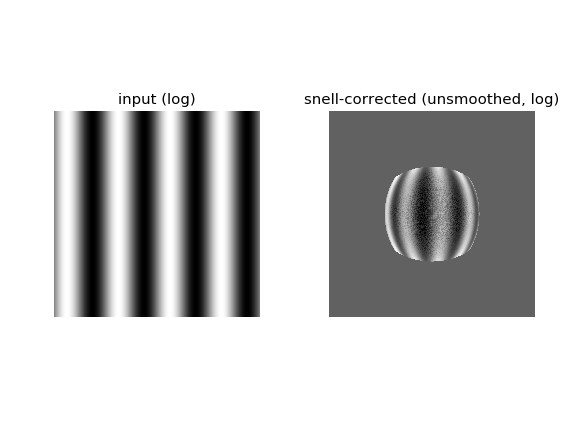

In [37]:
plt.figure()
plt.subplot(121)
plt.imshow(np.log(OMR_air),cmap='gray',interpolation='none')
plt.title('input (log)')
plt.axis('off')
plt.subplot(122)
plt.imshow(OMR_snell,cmap='gray',interpolation='none')
plt.title('snell-corrected (unsmoothed, log)')
plt.axis('off')
plt.tight_layout()

#### Checkered circle, dark background, with stimulus completely inside Snell window:

In [2]:
display = snell.snell(config = 'flat', dispres = 2000, dispcm = 2, ddisp = 0.5, dadw = 10)
display.make_display()

/home/twd/Dropbox/snell/snell_tool/snell.py:77: RuntimeWarning: invalid value encountered in arcsin
  theta_prime = np.arcsin(self.nw*np.sin(theta_)/self.na)
/home/twd/Dropbox/snell/snell_tool/snell.py:115: RuntimeWarning: invalid value encountered in double_scalars
  unit_x = x_cm/d_cm
/home/twd/Dropbox/snell/snell_tool/snell.py:116: RuntimeWarning: invalid value encountered in double_scalars
  unit_y = y_cm/d_cm


In [3]:
check_air = tifffile.imread('examples/example_check_inwindow.tif')

#### Initialize data structure for performing inverse transformations

In [5]:
display.init_inverse_transform()

#### Perform inverse transform

In [6]:
inverse = display.inverse_transform_image(check_air)

<IPython.core.display.Javascript object>


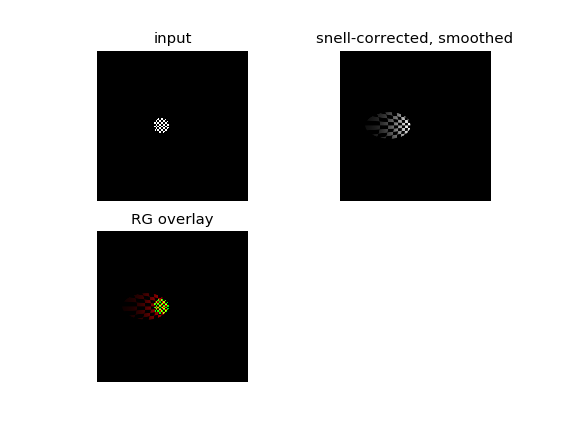

(-0.5, 3998.5, 3998.5, -0.5)

In [9]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse,cmap='gray',interpolation='none')
plt.title('snell-corrected, smoothed')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = inverse/np.max(inverse)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

In [32]:
inverse = display.inverse_transform_image(check_air,smooth=False)

<IPython.core.display.Javascript object>


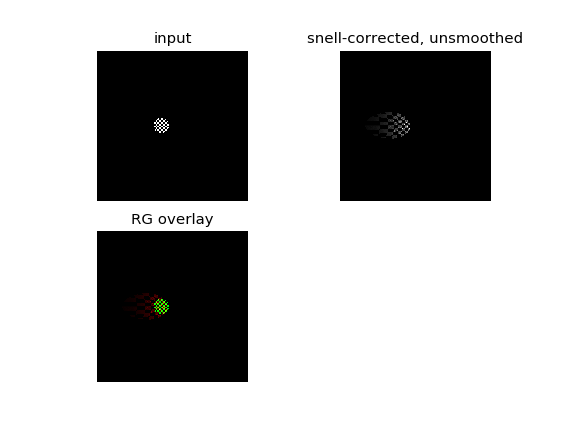

(-0.5, 3998.5, 3998.5, -0.5)

In [33]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse,cmap='gray',interpolation='none')
plt.title('snell-corrected, unsmoothed')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = inverse/np.max(inverse)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

#### inverse smoothed  + forward smoothed

In [ ]:
inverse = display.inverse_transform_image(check_air)
forward = display.transform_image(inverse)

<IPython.core.display.Javascript object>


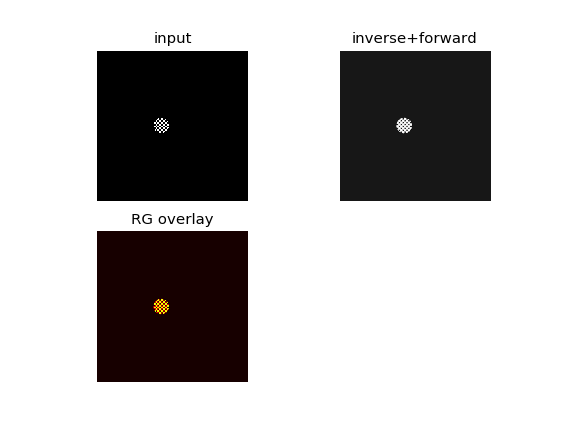

(-0.5, 3998.5, 3998.5, -0.5)

In [25]:
plt.figure()
plt.subplot(221)
plt.imshow(np.log(check_air+1),cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(forward,cmap='gray',interpolation='none')
plt.title('inverse+forward')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = (forward-np.min(forward))/(np.max(forward)-np.min(forward))
rg[:,:,1] = np.log(check_air+1)/np.max(np.log(check_air+1))

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

#### inverse smoothed + forward unsmoothed

In [26]:
inverse = display.inverse_transform_image(check_air)
forward = display.transform_image(inverse,smooth=False)

<IPython.core.display.Javascript object>


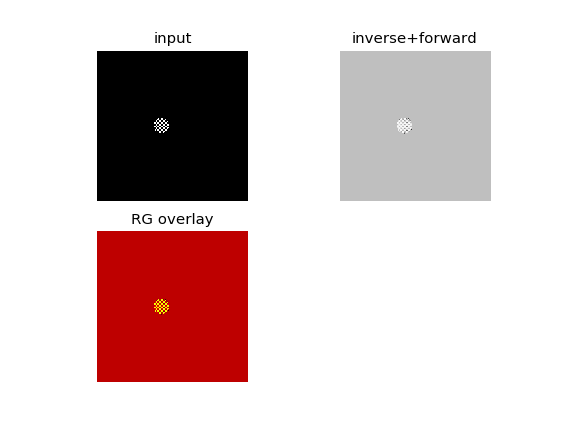

(-0.5, 3998.5, 3998.5, -0.5)

In [27]:
plt.figure()
plt.subplot(221)
plt.imshow(np.log(check_air+1),cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(forward,cmap='gray',interpolation='none')
plt.title('inverse+forward')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = (forward-np.min(forward))/(np.max(forward)-np.min(forward))
rg[:,:,1] = np.log(check_air+1)/np.max(np.log(check_air+1))

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

#### inverse unsmoothed + forward unsmoothed

In [28]:
inverse = display.inverse_transform_image(check_air,smooth=False)
forward = display.transform_image(inverse,smooth=False)

<IPython.core.display.Javascript object>


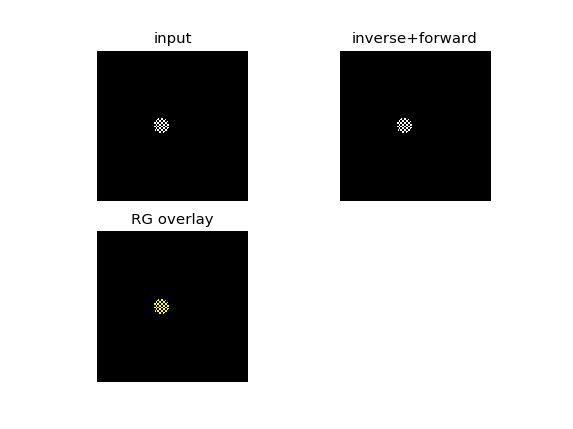

(-0.5, 3998.5, 3998.5, -0.5)

In [29]:
plt.figure()
plt.subplot(221)
plt.imshow(np.log(check_air+1),cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(forward,cmap='gray',interpolation='none')
plt.title('inverse+forward')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = (forward-np.min(forward))/(np.max(forward)-np.min(forward))
rg[:,:,1] = np.log(check_air+1)/np.max(np.log(check_air+1))

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

#### inverse unsmoothed + forward smoothed

In [30]:
inverse = display.inverse_transform_image(check_air,smooth=False)
forward = display.transform_image(inverse)

<IPython.core.display.Javascript object>


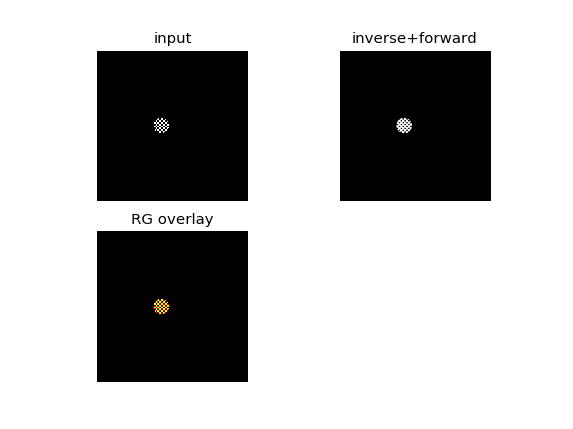

(-0.5, 3998.5, 3998.5, -0.5)

In [31]:
plt.figure()
plt.subplot(221)
plt.imshow(np.log(check_air+1),cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(forward,cmap='gray',interpolation='none')
plt.title('inverse+forward')
plt.axis('off')

rg = np.zeros((check_snell.shape[0],check_snell.shape[1],3))
rg[:,:,0] = (forward-np.min(forward))/(np.max(forward)-np.min(forward))
rg[:,:,1] = np.log(check_air+1)/np.max(np.log(check_air+1))

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')